In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def show_image(img1, img2):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(img1)
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    axes[1].imshow(img2)
    axes[1].set_title("Image with Laplacian Sharpening")
    axes[1].axis("off")

    plt.show()

The image has a lot of irregularly sized blurry edges, in the wave and along the cliff faces. The best choice for sharpening is Laplacian since 

  - It will find regions of rapidly changing intensity, and;  
  - subtract them from the original image to leave a sharpened result.  

This choice is more appropriate than some other candidates:  

- Unsharp masking has a fixed kernel size and mask intensity for the entire image.  
  - This means larger edges are altered but smaller edges may be missed.
  - Laplacian sharpening does not miss this because it catches where intensities change rapidly across the entire image.

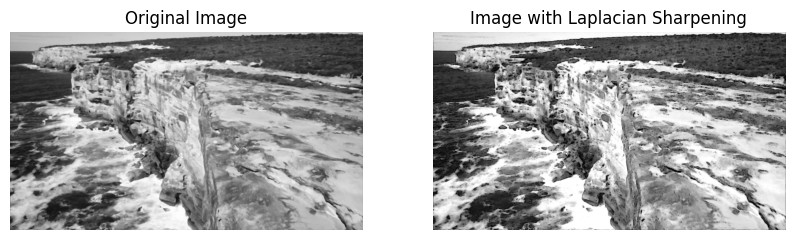

In [ ]:
image = cv2.imread("images/Task3.jpg")

# apply laplacian: g = f + a(h * f), for h a high-pass filter i.e. LoG
# Laplacian:        
laplacian = cv2.Laplacian(image, cv2.CV_64F, ksize=3)
laplacian = cv2.convertScaleAbs(laplacian)
sharpened_image = cv2.addWeighted(image, 1.2, laplacian, -0.8, 0)

show_image(image, sharpened_image)